In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

%matplotlib inline

In [2]:
dataset = fetch_olivetti_faces()
print(dataset.DESCR)

downloading Olivetti faces from http://cs.nyu.edu/~roweis/data/olivettifaces.mat to /Users/tsansom/scikit_learn_data
Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



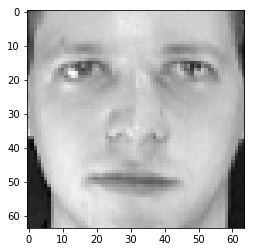

In [3]:
plt.imshow(dataset.images[0], cmap=plt.cm.gray)

In [4]:
(dataset.images[0].reshape(-1) == dataset.data[0]).sum()

4096

### The flattened data.images[0] is the same as data.data[0]

In [5]:
images = dataset.images
data = dataset.data
targets = dataset.target
print(images.shape, data.shape, targets.shape)

(400, 64, 64) (400, 4096) (400,)


### Split into training and test sets
* 30 in training set
* 10 in test set

In [6]:
train = data[targets < 30]
test = data[targets >=30]
print(train.shape, test.shape)

(300, 4096) (100, 4096)


In [7]:
n_faces = 30
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

In [8]:
n_pixels = data.shape[1]
X_train = train[:, :int(np.ceil(0.5 * n_pixels))] # top half of image
Y_train = train[:, int(np.floor(0.5 * n_pixels)):] # bottom half of image
X_test = test[:, :int(np.ceil(0.5 * n_pixels))]
Y_test = test[:, int(np.floor(0.5 * n_pixels)):]
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(300, 2048) (300, 2048) (30, 2048) (30, 2048)


In [9]:
ESTIMATORS = {
    'Extra Trees': ExtraTreesRegressor(n_estimators=10, max_features=32, random_state=0),
    'KNN': KNeighborsRegressor(),
    'Linear Regression': LinearRegression(),
    'Ridge': RidgeCV()
}

In [10]:
ESTIMATORS

{'Extra Trees': ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=32, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
 'KNN': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
 'Linear Regression': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 'Ridge': RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
     normalize=False, scoring=None, store_cv_values=False)}

In [11]:
y_test_predict = {}
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, Y_train)
    y_test_predict[name] = estimator.predict(X_test)

In [12]:
image_shape = (64, 64)

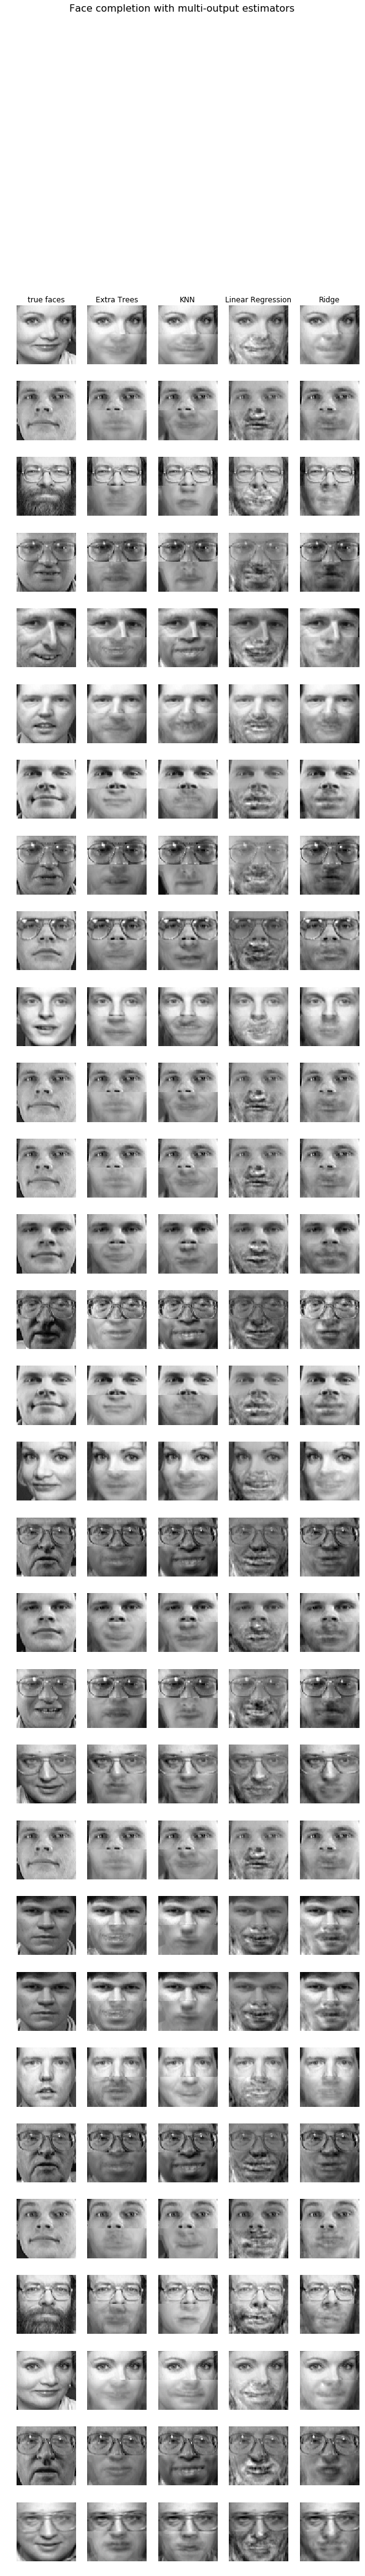

In [13]:
n_cols = len(ESTIMATORS) + 1
plt.figure(figsize=(2*n_cols, 2.26*n_faces))
plt.suptitle('Face completion with multi-output estimators', size=16)
for i in range(n_faces):
    true_face = np.hstack((X_test[i], Y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1,
                          title="true faces")


    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j,
                              title=est)

        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                   cmap=plt.cm.gray,
                   interpolation="nearest")
plt.show()

In [14]:
plt.imshow(np.hstack())

TypeError: hstack() missing 1 required positional argument: 'tup'